In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 5


In [2]:
df = pd.read_csv('us events ad_revenue filtered 03.02-07.02.csv')

In [3]:
df['event_json'] = df['event_json'].apply(lambda x: eval(x))

In [4]:
keys = ['ad_type', 'placement', 'view_index', 'session_view_index', 'cur_ticks', 
        'session_length', 'revenue', 'ads_ltv', 'ecpm_sma', 'normalized_ecpm_sma', 
        'value', 'currency', 'ad_country_code', 'network_name', 'ad_unit_id', 
        'ad_network_placement', 'creativeId']

for i in range(len(keys)):
    df[keys[i]] = df['event_json'].apply(lambda x: x[keys[i]])

df['eCPM'] = df['revenue']*1000

In [5]:
df = df.drop('event_json', axis=1)

In [6]:
df[['ad_type', 'city','os_version','eCPM', 'revenue']].profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

1. Средние eCPM юзеров

  ad_type       eCPM
0  banner   0.744113
1     int  36.209634
2      rv  65.051165


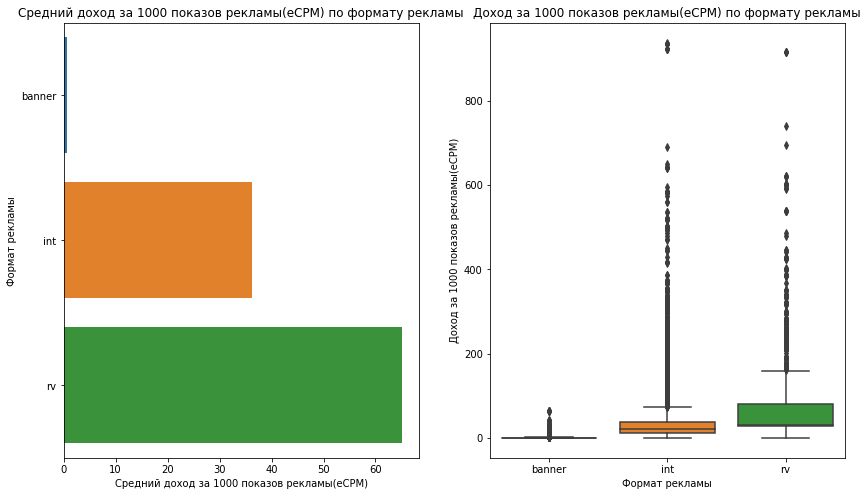

In [6]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)

sns.barplot(x = 'eCPM', y ='ad_type', data = df , estimator=np.mean, ci=None)
plt.title('Средний доход за 1000 показов рекламы(eCPM) по формату рекламы')
plt.xlabel('Средний доход за 1000 показов рекламы(eCPM)')
plt.ylabel('Формат рекламы');
print(df.groupby('ad_type', as_index=False)[['ad_type','eCPM']].agg({'eCPM':'mean'}))

plt.subplot(1,2,2)
sns.boxplot(y = 'eCPM', x ='ad_type', data = df)
plt.title('Доход за 1000 показов рекламы(eCPM) по формату рекламы')
plt.ylabel('Доход за 1000 показов рекламы(eCPM)')
plt.xlabel('Формат рекламы');


  ad_type          eCPM
0  banner  6.071840e+05
1     int  1.361953e+06
2      rv  4.216617e+05
   ad_type
0   815984
1    37613
2     6482


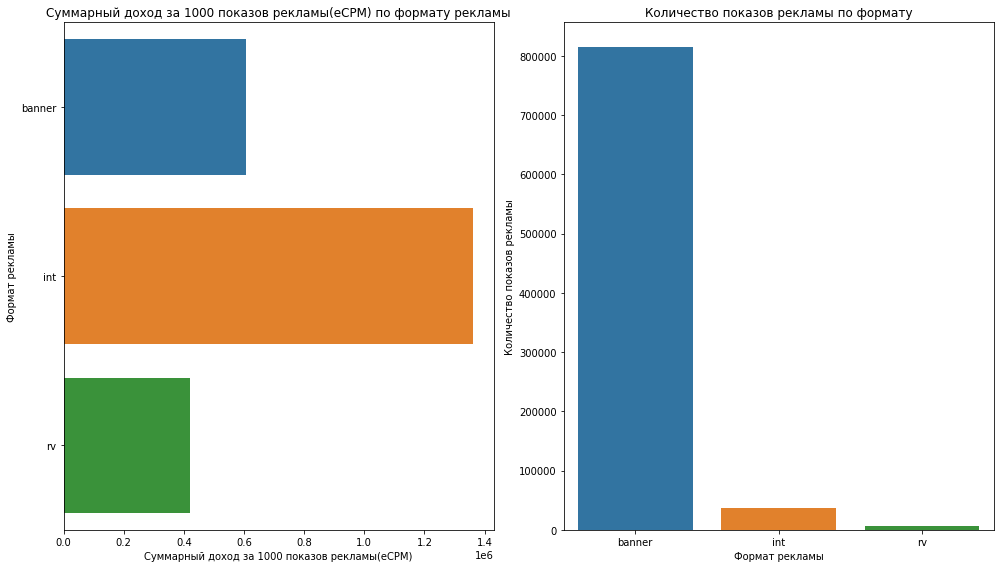

In [13]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)

sns.barplot(x = 'eCPM', y ='ad_type', data = df , estimator=np.sum, ci=None)
plt.title('Суммарный доход за 1000 показов рекламы(eCPM) по формату рекламы')
plt.xlabel('Суммарный доход за 1000 показов рекламы(eCPM)')
plt.ylabel('Формат рекламы');
print(df.groupby('ad_type', as_index=False)[['ad_type','eCPM']].agg({'eCPM':'sum'}))

plt.subplot(1,2,2)

sns.countplot(x = 'ad_type', data = df)
plt.title('Количество показов рекламы по формату')
plt.xlabel('Формат рекламы')
plt.ylabel('Количество показов рекламы');
plt.tight_layout()

print(df.groupby('ad_type', as_index=False)[['ad_type']].agg({'ad_type':'count'}))


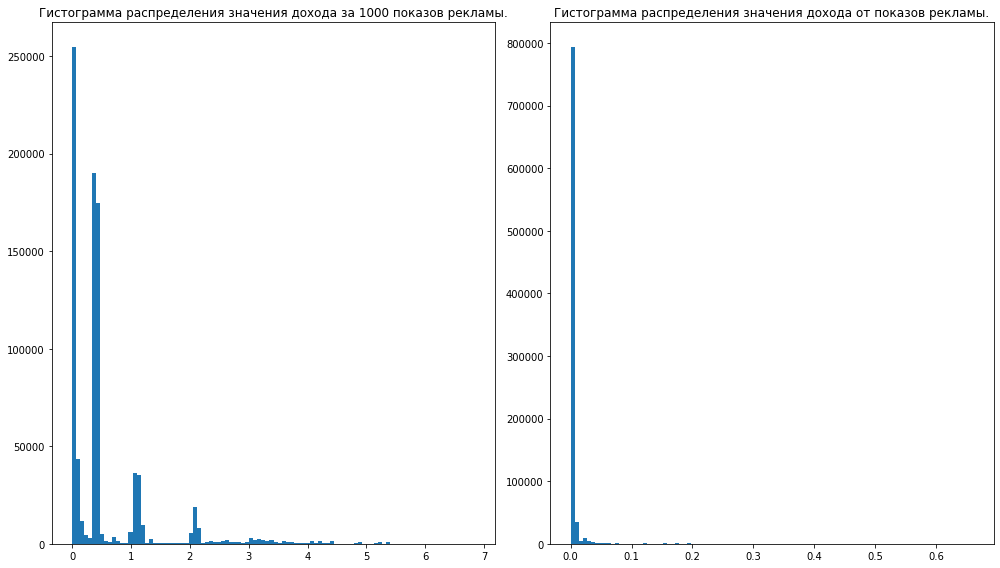

In [15]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.hist(df['eCPM'].apply(lambda x: np.log(x+1)), bins=100);
plt.title('Гистограмма распределения значения дохода за 1000 показов рекламы.');
plt.subplot(1,2,2)
plt.hist(df['revenue'].apply(lambda x: np.log(x+1)), bins=100);
plt.title('Гистограмма распределения значения дохода от показов рекламы.');
plt.tight_layout()

1.b Средние по eCPM по городам и ОС 

In [84]:
mean_eCPM_city = df.groupby(['city','ad_type'], as_index=False)[['city', 'eCPM']]\
                                        .agg({'eCPM':'mean'})\
                                        .sort_values(by='eCPM', ascending=False)

for i in range(mean_eCPM_city.shape[0]):
    if mean_eCPM_city['eCPM'][i] < 211.7:
        mean_eCPM_city.loc[i, 'city'] = 'another'

mean_eCPM_city=mean_eCPM_city.groupby(['city','ad_type'], as_index=False)[['city', 'eCPM']]\
                                        .agg({'eCPM':'mean'})\
                                        .sort_values(by='eCPM', ascending=False)

,13,36,31,26,22,50,45,44,20,19,...,11,15,16,18,21,23,25,55,54,53
city,East Peoria,Norwood,Madisonville,La Crosse,Idaho Falls,Valparaiso,Rohnert Park,Rocky Mount,Hilliard,Glen Burnie,...,Durham,Exeter,Fontana,Gastonia,Hurricane,Johnson City,Kennesaw,another,another,another
ad_type,rv,rv,int,int,rv,rv,int,rv,rv,rv,...,rv,rv,rv,rv,rv,rv,rv,rv,int,banner
eCPM,808.29482,597.984497,437.039882,415.159332,366.840286,318.75,297.6,290.11197,278.536986,276.947998,...,211.7,211.7,211.7,211.7,211.7,211.7,211.7,63.175862,41.938717,1.026122


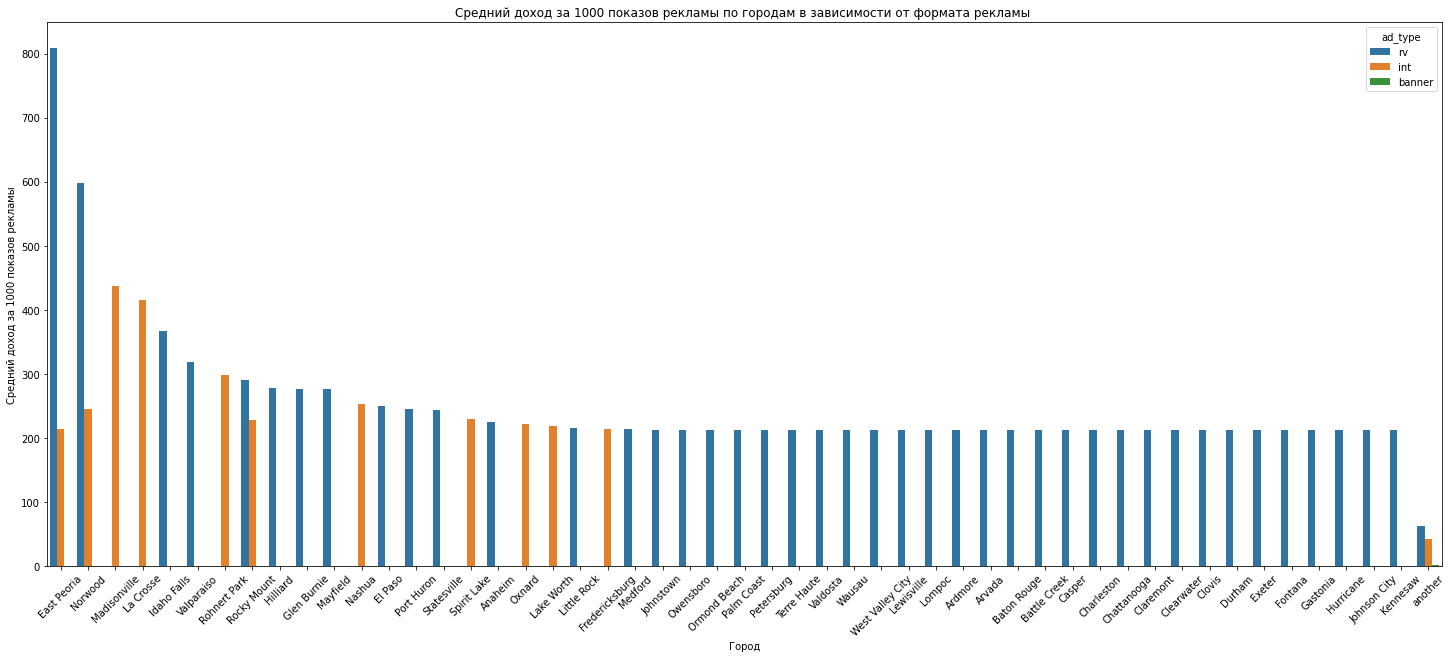

In [85]:
plt.figure(figsize = (25,10))
sns.barplot(x='city', y='eCPM',hue='ad_type',  data = mean_eCPM_city)
plt.title('Средний доход за 1000 показов рекламы по городам в зависимости от формата рекламы ')
plt.xlabel('Город')
plt.ylabel('Средний доход за 1000 показов рекламы');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);
mean_eCPM_city_anomal.T


In [86]:
mean_eCPM_os = df.groupby(['os_version','ad_type'], as_index=False)[['city', 'eCPM']]\
                                        .agg({'eCPM':'mean'})\
                                        .sort_values(by='eCPM', ascending=False)


,17,8,5,2,31,7,16,25,4,28,...,3,0,29,23,26,15,12,18,9,21
os_version,7.0,12,11,10,9,12,7.0,8.0.0,11,8.1.0,...,11,10,9,8.0.0,8.1.0,7.0,6.0.1,7.1.1,5.0.2,7.1.2
ad_type,rv,rv,rv,rv,rv,int,int,rv,int,rv,...,banner,banner,banner,banner,banner,banner,banner,banner,banner,banner
eCPM,79.662468,79.568911,53.378872,53.336882,50.151552,42.39107,39.266162,38.614653,33.468471,31.830249,...,0.592766,0.591274,0.549553,0.368201,0.320697,0.278132,0.254481,0.236141,0.198288,0.144868


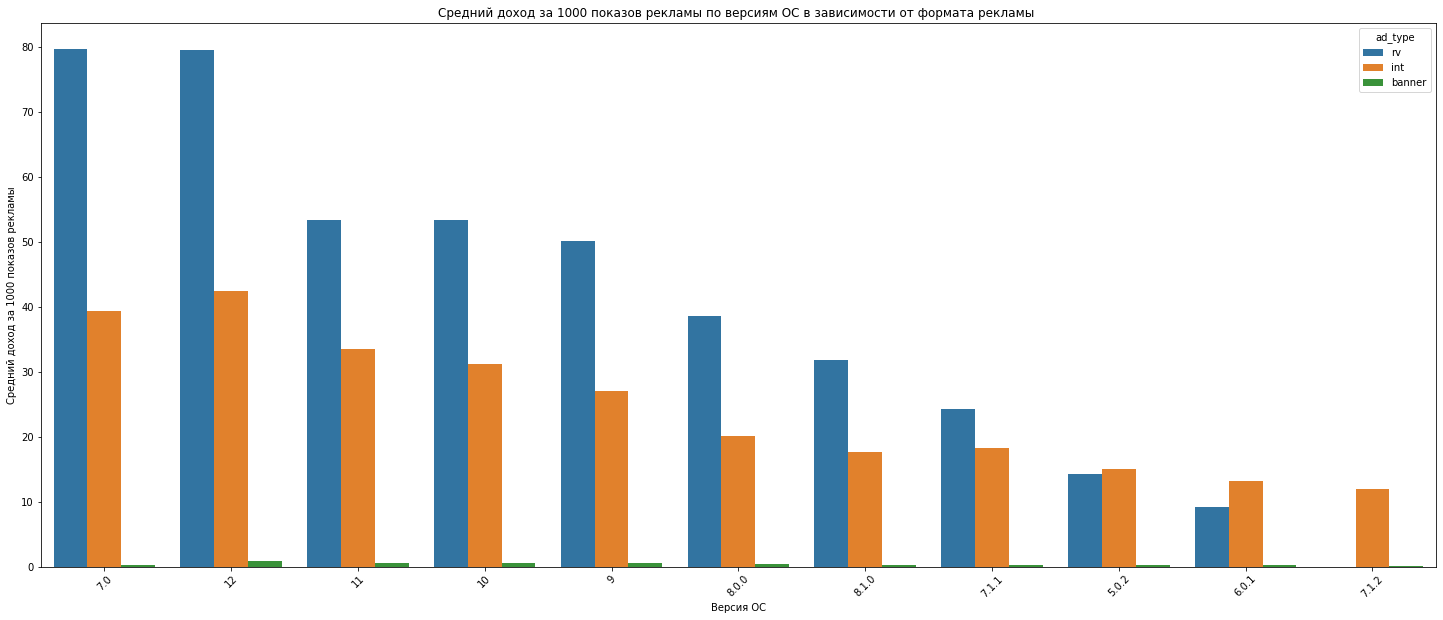

In [87]:
plt.figure(figsize = (25,10))
sns.barplot(x='os_version', y='eCPM',hue='ad_type',  data = mean_eCPM_os)
plt.title('Средний доход за 1000 показов рекламы по версиям ОС в зависимости от формата рекламы ')
plt.xlabel('Версия ОС')
plt.ylabel('Средний доход за 1000 показов рекламы');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);
mean_eCPM_os.T

1.b Учитывая статистическую значимость 

Предполагаю, что под статистической значимостью в данном контексте предполагалось отсутсвие аномалий, так как в данных не подразумевается проверки на статистическую значимость изменения, например в рамках А/В тестов, или других других сценариев.

Подход:

Если считать, что аномалии в выборке не значимы, то можно обросить выбросы - значения находящиеся за пределами 3 интерквартильных отклонений. Т.е 

*значения, лежащие между нижней и верхней квартилями, являются наиболее
характерными;

*значения, которые отклоняются от нижней и верхней квартилей не больше, чем на полтора интерквартильных размаха, т.е. удовлетворяют неравенству Q1-3 * IQR <= x < Q1 или  неравенству Q3 < x <= Q3+3 * IQR , не столь характерны,
но должны учитываться как значимые, т.к. их отклонения от
типичных значений не очень большие;

*значения, которые отклоняются от нижней и верхней квартилей
больше, чем на полтора интерквартильных размаха, т.е.
удовлетворяют неравенству x < Q1-3 * IQR или неравенству x > Q3+3 * IQR считать выбросами или статистически не значимыми.



In [17]:
IQR = np.quantile(df['eCPM'], 0.75) - np.quantile(df['eCPM'], 0.25)
    
low_bound = np.quantile(df['eCPM'], 0.25) - (3 * IQR)
up_bound = np.quantile(df['eCPM'], 0.75) + (3 * IQR)

up_bound, low_bound

(1.9952901, -1.4158218)

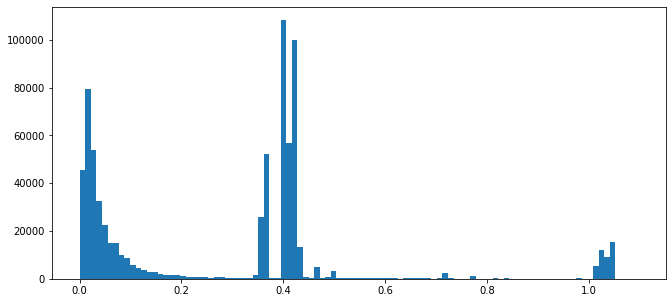

In [18]:
df_whout_anomal = df[df['eCPM']>= low_bound ]
df_whout_anomal = df_whout_anomal[df_whout_anomal['eCPM']<= up_bound]
plt.hist(df_whout_anomal['eCPM'].apply(lambda x: np.log(x+1)),bins=100); 

In [90]:
mean_eCPM_city_whout_anomal = df_whout_anomal.groupby(['city','ad_type'], as_index=False)[['city', 'eCPM']]\
                                        .agg({'eCPM':'mean'})\
                                        .sort_values(by='eCPM', ascending=False)

for i in range(mean_eCPM_city_whout_anomal.shape[0]):
    if mean_eCPM_city_whout_anomal['eCPM'][i] <= 1.623679:
        mean_eCPM_city_whout_anomal.loc[i, 'city'] = 'another'

mean_eCPM_city_whout_anomal=mean_eCPM_city_whout_anomal.groupby(['city','ad_type'], as_index=False)[['city', 'eCPM']]\
                                        .agg({'eCPM':'mean'})\
                                        .sort_values(by='eCPM', ascending=False)

,0,37,7,36,45,25,46,5,6,3,...,10,32,15,14,35,47,26,52,51,50
city,Allentown,Royal Oak,Dallas,Roosevelt,Watertown,Montgomery,Wausau,Bonners Ferry,Clarks Summit,Asheboro,...,Fort Walton Beach,Paducah,Greenville,Geneva,Romulus,West Chester,New Ulm,another,another,another
ad_type,int,int,int,int,int,banner,banner,banner,banner,banner,...,int,rv,int,int,int,banner,int,rv,int,banner
eCPM,1.93893,1.928501,1.926401,1.9125,1.905825,1.862491,1.85837,1.85837,1.85837,1.85837,...,1.6422,1.641197,1.636353,1.634619,1.632453,1.624211,1.623679,1.489838,1.319621,0.441097


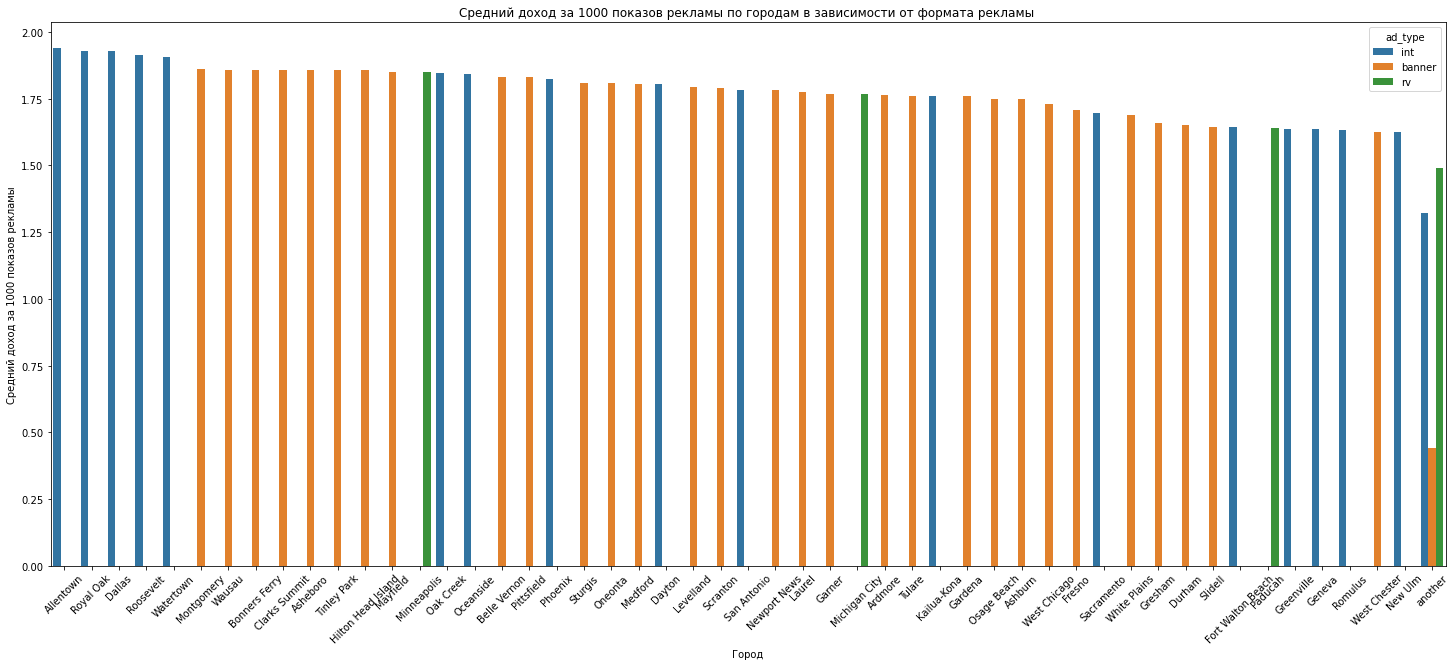

In [92]:
plt.figure(figsize = (25,10))
sns.barplot(x='city', y='eCPM',hue='ad_type',  data = mean_eCPM_city_whout_anomal)
plt.title('Средний доход за 1000 показов рекламы по городам в зависимости от формата рекламы ')
plt.xlabel('Город')
plt.ylabel('Средний доход за 1000 показов рекламы');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);
mean_eCPM_city_whout_anomal.T


In [23]:
mean_eCPM_OS_whout_anomal = df_whout_anomal.groupby(['os_version','ad_type'], as_index=False)[['os_version', 'eCPM']]\
                                        .agg({'eCPM':'mean'})\
                                        .sort_values(by='eCPM', ascending=False)

,12,8,5,18,1,4,11,7,2,20,...,0,3,19,16,17,13,10,9,14,15
os_version,6.0.1,12,11,8.1.0,10,11,6.0.1,12,10,9,...,10,11,9,8.0.0,8.1.0,7.0,6.0.1,5.0.2,7.1.1,7.1.2
ad_type,rv,rv,rv,int,int,int,int,int,rv,int,...,banner,banner,banner,banner,banner,banner,banner,banner,banner,banner
eCPM,1.845052,1.660775,1.649193,1.578784,1.418201,1.417736,1.416696,1.395115,1.214609,1.175053,...,0.356119,0.315379,0.306303,0.260678,0.248411,0.21598,0.214155,0.188356,0.18446,0.133771


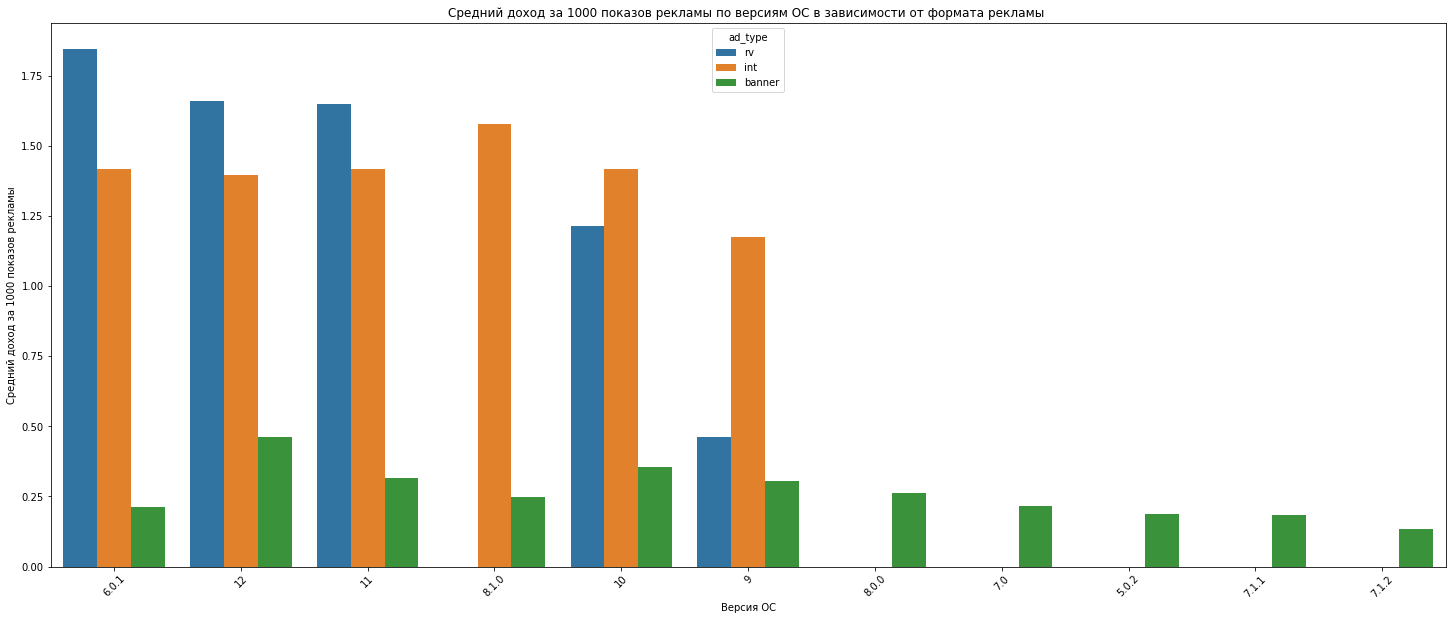

In [24]:
plt.figure(figsize = (25,10))
sns.barplot(x='os_version', y='eCPM',hue='ad_type',  data = mean_eCPM_OS_whout_anomal)
plt.title('Средний доход за 1000 показов рекламы по версиям ОС в зависимости от формата рекламы ')
plt.xlabel('Версия ОС')
plt.ylabel('Средний доход за 1000 показов рекламы');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);
mean_eCPM_OS_whout_anomal.T

Описание наблюдений только для фильтрованных данных без выбросов:
В рамках исследования выделены топ 50 городов с наимбольшими среднийми доходами с 1000 показов рекламы.
Топ городов - Alletown, Royal Oak, Dallas, Roosevelt, Watertown. Доход от показов рекламы юзерам из этих городов преимущественно от полноэкранной рекламы. Но далее, с уменьшением еСРМ, большую часть наблюдений занимаю города в которых средний доход с 1000 показов больше для баннерной рекламы, чем для остальных форматов. 

Средний доход с 1000 показов рекламы для групп пользователей играющих с версий 6.0.1, 12, 11 оказался наибольшим, причем преобладающим форматом являются видео и полноэкранная рекламы. Наименьший еСРМ приносят пользователи с версиями 8.0.0., 7.0., 5.0.2, 7.1.1., 7.1.2.Они смотели только баннерную рекламу. 





1.с Суммарные доходы по городам и версиям ОС

In [34]:
sum_reven_city = df.groupby(['city','ad_type'], as_index=False)[['city', 'revenue']]\
                                        .agg({'revenue':'sum'})\
                                        .sort_values(by='revenue', ascending=False)

for i in range(sum_reven_city.shape[0]):
    if sum_reven_city['revenue'][i] < 5.32:
        sum_reven_city.loc[i, 'city'] = 'another'

sum_reven_city=sum_reven_city.groupby(['city','ad_type'], as_index=False)[['city', 'revenue']]\
                                        .agg({'revenue':'sum'})\
                                        .sort_values(by='revenue', ascending=False)

In [35]:
sum_reven_vOS = df.groupby(['os_version','ad_type'], as_index=False)[['os_version', 'revenue']]\
                                        .agg({'revenue':'sum'})\
                                        .sort_values(by='revenue', ascending=False)



,51,50,52,33,20,7,30,3,17,32,...,42,44,40,0,10,22,48,37,21,28
city,another,another,another,New York,Indianapolis,Cleveland,Minneapolis,Charlotte,Houston,New York,...,Rocky Mount,Seattle,Portland,Austin,Dallas,Kansas City,St. Louis,Omaha,Indianapolis,Milwaukee
ad_type,int,banner,rv,int,int,int,int,int,int,banner,...,rv,int,int,int,banner,banner,int,int,rv,int
revenue,538.545383,293.390304,229.150693,25.674272,21.534431,18.112861,17.286339,14.940739,14.497606,12.708617,...,5.802239,5.778304,5.668748,5.635643,5.592234,5.582028,5.502309,5.441422,5.35587,5.32444


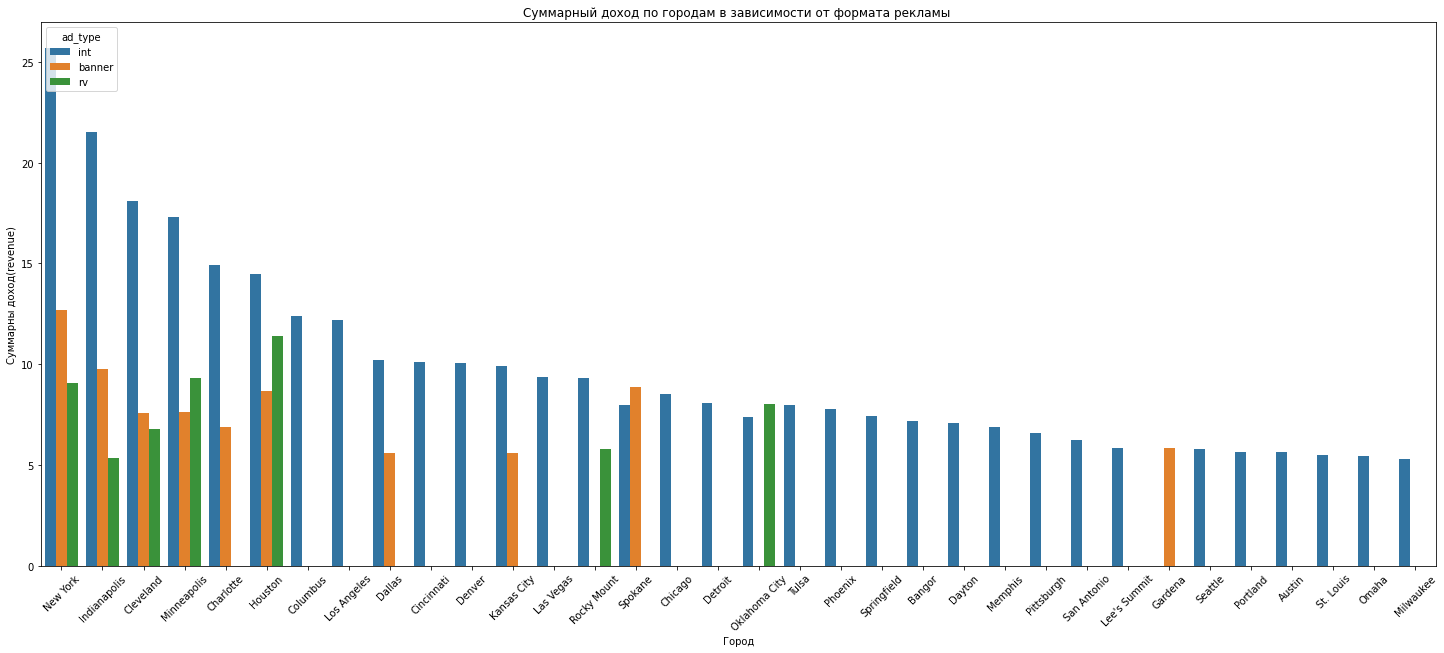

In [36]:
plt.figure(figsize = (25,10))
sns.barplot(x='city', y='revenue',hue='ad_type',  data = sum_reven_city[sum_reven_city['city'] != 'another'])
plt.title('Суммарный доход по городам в зависимости от формата рекламы ')
plt.xlabel('Город')
plt.ylabel('Суммарны доход(revenue)');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

sum_reven_city.T

,7,4,6,8,1,3,5,0,30,2,29,31,16,24,27,26,23,25,17,19,15,28,22,13,10,18,21,12,9,20,14,11
os_version,12,11,12,12,10,11,11,10,9,10,9,9,7.0,8.0.0,8.1.0,8.1.0,8.0.0,8.0.0,7.0,7.1.1,7.0,8.1.0,7.1.2,6.0.1,5.0.2,7.1.1,7.1.2,6.0.1,5.0.2,7.1.1,6.0.1,5.0.2
ad_type,int,int,banner,rv,int,banner,rv,banner,int,rv,banner,rv,int,int,int,banner,banner,rv,rv,int,banner,rv,int,int,int,banner,banner,banner,banner,rv,rv,rv
revenue,704.497187,363.634932,363.488994,237.592767,191.795052,116.298348,107.291533,85.002788,78.475755,51.470091,34.820249,19.809863,7.813966,6.770185,6.016151,2.847789,2.804952,2.316879,2.071224,1.203363,1.065803,0.923077,0.837482,0.579568,0.329325,0.300135,0.252216,0.166939,0.135827,0.121076,0.036764,0.028377


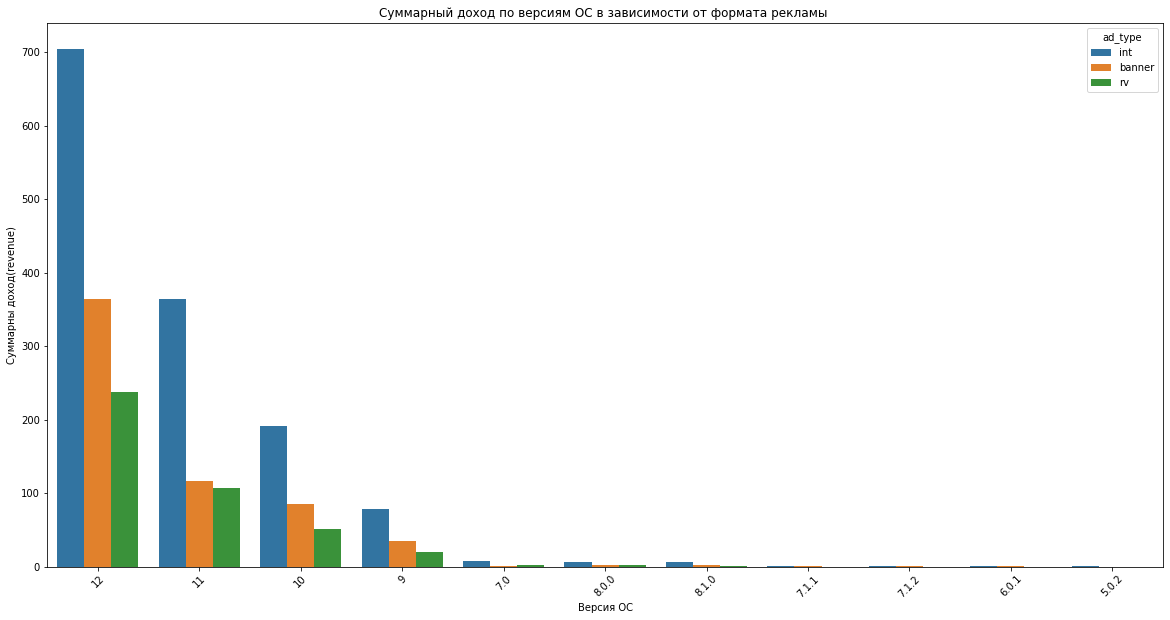

In [189]:
plt.figure(figsize = (20,10))
sns.barplot(x='os_version', y='revenue',hue='ad_type',  data = sum_reven_vOS)
plt.title('Суммарный доход по версиям ОС в зависимости от формата рекламы ')
plt.xlabel('Версия ОС')
plt.ylabel('Суммарны доход(revenue)');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);
sum_reven_vOS.T

4. Зависит ли eCPM от времени дня 

In [37]:
df['event_hour'] = pd.to_datetime(df['event_datetime']).dt.hour
df['event_month'] = pd.to_datetime(df['event_datetime']).dt.month
df['event_weekday'] = pd.to_datetime(df['event_datetime']).dt.weekday

In [69]:
mean_eCPM_hour = df.groupby(['event_hour'], as_index=False)[['event_hour', 'eCPM']]\
                                        .agg({'eCPM':'mean'})\
                                        .sort_values(by='event_hour', ascending=False)

mean_eCPM_hour_ad = df.groupby(['event_hour', 'ad_type'], as_index=False)[['event_hour', 'eCPM']]\
                                        .agg({'eCPM':'mean'})\
                                        .sort_values(by='event_hour', ascending=False)

mean_eCPM_count = df.groupby(['event_hour'], as_index=False)[['event_hour', 'eCPM']]\
                                        .agg({'eCPM':'count'})\
                                        .sort_values(by='event_hour', ascending=False)

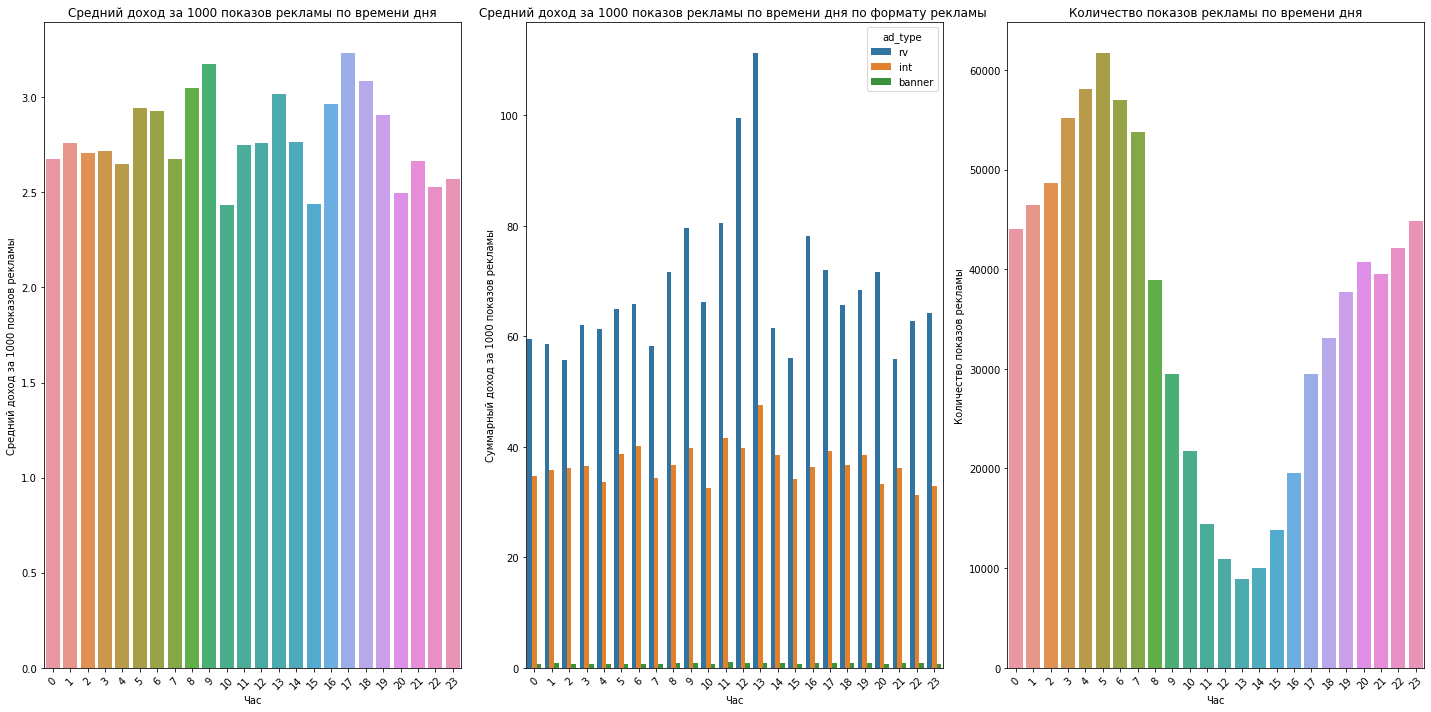

In [72]:
plt.figure(figsize = (20,10))

plt.subplot(1,3,1)
sns.barplot(x='event_hour', y='eCPM', data = mean_eCPM_hour, ci=None)
plt.title('Средний доход за 1000 показов рекламы по времени дня')
plt.xlabel('Час')
plt.ylabel('Средний доход за 1000 показов рекламы');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

plt.subplot(1,3,2)
sns.barplot(x='event_hour', y='eCPM', hue = 'ad_type',  data = mean_eCPM_hour_ad, ci=None)
plt.title('Средний доход за 1000 показов рекламы по времени дня по формату рекламы ')
plt.xlabel('Час')
plt.ylabel('Суммарный доход за 1000 показов рекламы');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

plt.subplot(1,3,3)
sns.barplot(x='event_hour', y='eCPM', data = mean_eCPM_count, ci=None)
plt.title('Количество показов рекламы по времени дня')
plt.xlabel('Час')
plt.ylabel('Количество показов рекламы');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);
plt.tight_layout()


Описание наблюдений и выводы по исследованию(для не отфильтрованных данных):

1.Наибольший средний доход с 1000 показов приносит реклама в формате видео, которое юзер смотрит по желанию и за
просмотр получает монетки или др. ресурсы- 65,05. Несмотря на то, что показов такого формата рекламы за исследованный период наблюдается меньше, чем у других форматов рекламы - 6482.

Баннерная реклама с наибольший количеством показов -815984, принесла наименьший средний доход с 1000 показов -0,74.
Полноэкранная реклама занимает второе место по среднему доходу с 1000 показов.


2.Для сравнения средненго eCPM по городам отбораны топ 50 городов с наибольшим значением показателя.

Средний доход с 1000 показов рекламы для топ 50 городов складывается из показов двух форматов реклам: полноэкранной и видео рекламы. 
Пользователи городов East Peoria, Nordwood приносят самый большой еСРМ, складывающийся в основной из показов видео рекламы.

Далее города Madisonville, La Crosse в которых в  eCPM преобладают доходы от полноэкранной рекламы. 

Средний Доход с 1000 показов рекламы групп пользователей с версиями ОС 7.0, 12 наибольший из всех и складывается в основном из показов видео.
Доля доходов от баннерной рекламы в еСРМ очень мала для всех версия ОС.

Доля доходов от видео рекламы в еСРМ преобладает во всех версиях ОС, кроме 6.0.1 и 7.1.2, еСРМ которых складывается: для 6.0.1. из полноэкранной рекламы и видео рекламы, а для 7.1.2.- только из полноэкранной рекламы.
Замечу, что реклама версий ОС 6.0.1 и 7.1.2 приносит наименьший средний доход с 1000 показов рекламы.

3.В топ городах по суммарному доходу преобладает доход от полноэкранной рекламы. Наибольший доход от рекламы приносят пользователи из Нью-Йорка. 
В городах New York, Indianopolis, Cleveland, Minneapolis, Charlotte наибольший доход от полноэкранной рекламы, а баннерная раклама и виодео реклама распределены примерно в равных соотношениях в зависимости от города 

Пользователи играющие с версии ОС 12 приносят наибольший доход, который строится в основном из полноэкранной рекламы -704 у.е., баннерной рекламы- 364 у.е., видео рекламы 237 у.е.

Основной доход поступает с показов рекламы пользователям с версиями 12, 11, 10, 9, причем в основном от полноэкранной рекламы. 
Начиная с версии ОС 8.0.0 доход незначителен. 

Наибольший средний доход от 1000 показов рекламы распределен среди промежутков времени:с 8.00-9.00, 13.00 и с 17.00-19.00. 
Причем если посмотреть на колисество пользователей по часам то, в проежуток в 13.00 наблюдается наименьшее количество пользователей. Довольно большие рещультаты средего еСРМ достигаются тем, что в этот промежуток люди активнее, чем в другое время смотрят рекламные видео для получения монет. 

Вывод:

На протяжении всего исследования наблюдалась зависимость получаемого дохода от рекламы/1000 показов рекламы. Использование полноэкранной и видео реклам намного эффективнее в сревнении с баннерное рекламой. Это утверждение подтверждается тем, что среднее еСРМ и суммарный доход от рекламы топ-50 городов (по среденему еСРМ) складываются из доходов за полноэкранную рекламу и видео. Доля баннерной рекламы в среднем доходе с 1000 показов рекламы в зависимости от версии ОС пользовтеля очень мала.

Можно исследовать вариант пересмотра стратегии баннерной рекламы: частичного отказа и перенаправления трафика в пользу полноэкранной рекламы и проанализоровать  возможность улучшения сценария вознаграждения пользователей после просмотра видео, для того чтобы увеличить количество просмотров выделенных типов реклам и повысить средний доход с 1000 показов рекламы, а соответветственно и доход.

